In [3]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import random
import netCDF4
import seaborn as sns
from global_land_mask import globe
from netCDF4 import Dataset, num2date
from scipy import interpolate

In [4]:
path = r'G:\MLD_temp_eq\1981-2022\SST\sst.day.mean.1982.nc'
nc0 = Dataset(path)
sst = nc0.variables['sst'][:,:,:]
sst.shape

(365, 720, 1440)

In [11]:
lat = nc0.variables['lat'][:].data
lat.shape

(720,)

In [20]:
lat1 = lat[159:280]
lat1  # -50.125 ... -20.125

array([-50.125, -49.875, -49.625, -49.375, -49.125, -48.875, -48.625,
       -48.375, -48.125, -47.875, -47.625, -47.375, -47.125, -46.875,
       -46.625, -46.375, -46.125, -45.875, -45.625, -45.375, -45.125,
       -44.875, -44.625, -44.375, -44.125, -43.875, -43.625, -43.375,
       -43.125, -42.875, -42.625, -42.375, -42.125, -41.875, -41.625,
       -41.375, -41.125, -40.875, -40.625, -40.375, -40.125, -39.875,
       -39.625, -39.375, -39.125, -38.875, -38.625, -38.375, -38.125,
       -37.875, -37.625, -37.375, -37.125, -36.875, -36.625, -36.375,
       -36.125, -35.875, -35.625, -35.375, -35.125, -34.875, -34.625,
       -34.375, -34.125, -33.875, -33.625, -33.375, -33.125, -32.875,
       -32.625, -32.375, -32.125, -31.875, -31.625, -31.375, -31.125,
       -30.875, -30.625, -30.375, -30.125, -29.875, -29.625, -29.375,
       -29.125, -28.875, -28.625, -28.375, -28.125, -27.875, -27.625,
       -27.375, -27.125, -26.875, -26.625, -26.375, -26.125, -25.875,
       -25.625, -25.

In [21]:
lon = nc0.variables['lon'][:].data
lon.shape

(1440,)

In [27]:
lon1 = lon[1280:]
lon1 # 320.125 ... 359.875

array([320.125, 320.375, 320.625, 320.875, 321.125, 321.375, 321.625,
       321.875, 322.125, 322.375, 322.625, 322.875, 323.125, 323.375,
       323.625, 323.875, 324.125, 324.375, 324.625, 324.875, 325.125,
       325.375, 325.625, 325.875, 326.125, 326.375, 326.625, 326.875,
       327.125, 327.375, 327.625, 327.875, 328.125, 328.375, 328.625,
       328.875, 329.125, 329.375, 329.625, 329.875, 330.125, 330.375,
       330.625, 330.875, 331.125, 331.375, 331.625, 331.875, 332.125,
       332.375, 332.625, 332.875, 333.125, 333.375, 333.625, 333.875,
       334.125, 334.375, 334.625, 334.875, 335.125, 335.375, 335.625,
       335.875, 336.125, 336.375, 336.625, 336.875, 337.125, 337.375,
       337.625, 337.875, 338.125, 338.375, 338.625, 338.875, 339.125,
       339.375, 339.625, 339.875, 340.125, 340.375, 340.625, 340.875,
       341.125, 341.375, 341.625, 341.875, 342.125, 342.375, 342.625,
       342.875, 343.125, 343.375, 343.625, 343.875, 344.125, 344.375,
       344.625, 344.

In [39]:
sst1 = sst[:,:280,1180:]
sst1.shape

(365, 280, 260)

In [40]:
sst2 = np.mean(sst1, axis = 0)
np.min(sst2.data)


-1.7443804179152398

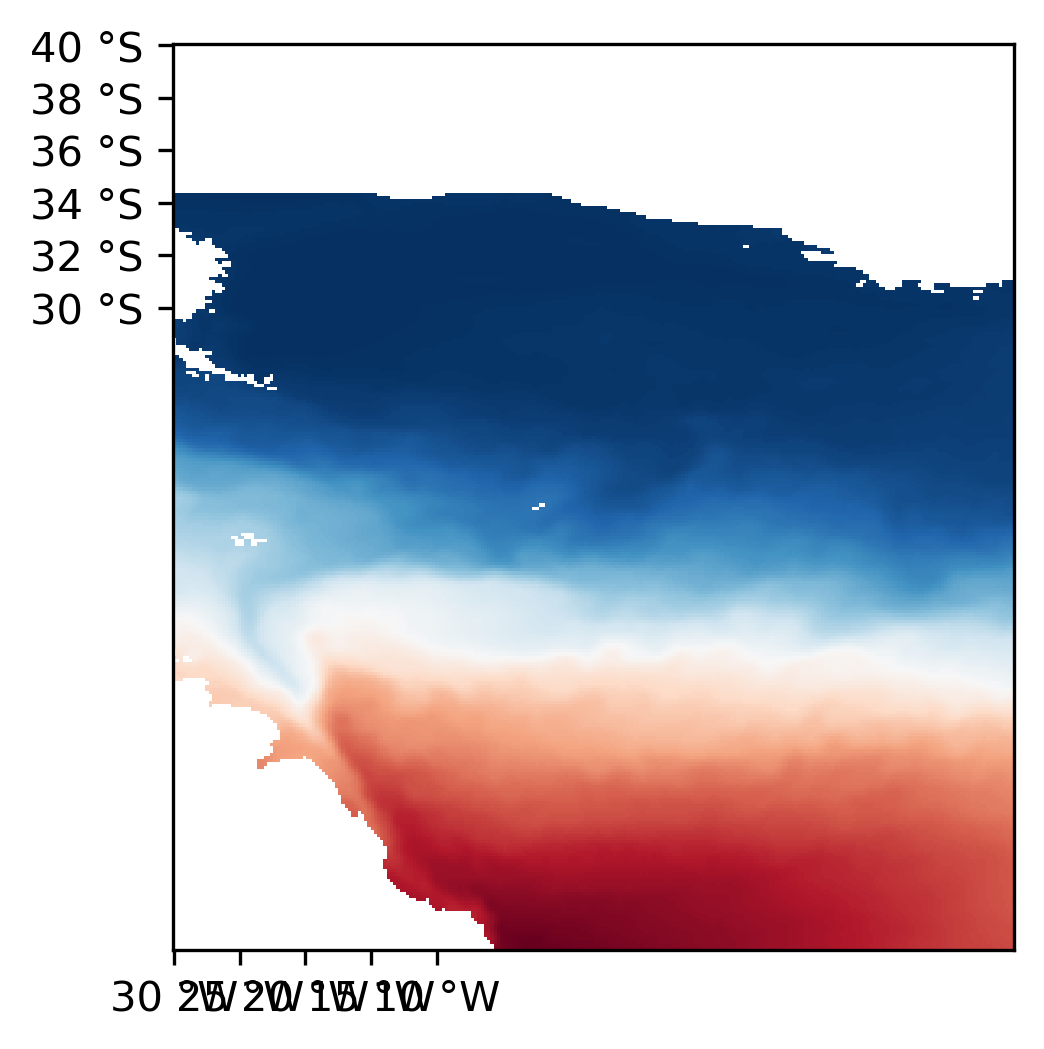

In [41]:
# 可视化海洋上的SST分布
plt.figure(dpi=300)
plt.xticks([])  # 去掉x轴
plt.yticks([])  # 去掉y轴
# plt.title("SST(ɛ - 0)", loc='left',fontsize='xx-large',fontweight='light')
# h = plt.imshow(sst1[::-1, :], cmap=plt.cm.RdBu_r)
# h = plt.imshow(sst1[::-1, :], cmap=plt.cm.RdBu_r)
h = plt.imshow(sst2, cmap=plt.cm.RdBu_r)
# cb = plt.colorbar(h,orientation='horizontal')
# cb.ax.tick_params(labelsize=24)
# ax.tick_params(labelsize=16)
# 画框
ax = plt.gca()

#添加x轴刻度
tick_locs = np.linspace(0,81,5)

plt.xticks(tick_locs, ['30 °W','25 °W','20 °W','15 °W','10 °W'])

#添加Y轴刻度
tick_locs_y = np.linspace(0,81,6)

plt.yticks(tick_locs_y, ['40 °S','38 °S','36 °S','34 °S','32 °S', '30 °S'])

# 默认框的颜色是黑色，第一个参数是左上角的点坐标
# 第二个参数是宽，第三个参数是长
ax.add_patch(plt.Rectangle((760, 220), 201, 41, color = 'black',fill=False, linewidth=4))  # 0-1440   0-681
plt.show()  